In [1]:
import json
import logging
import os
from pathlib import Path
from hdmf_zarr import NWBZarrIO
from importlib import reload

import warnings
from aind_dynamic_foraging_data_utils import code_ocean_utils as co_utils
from aind_dynamic_foraging_data_utils import nwb_utils, alignment, enrich_dfs


In [2]:
cd .. 

/root/capsule/code


/opt/conda/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import sys

from analysis_wrapper import analysis_util
from analysis_pipeline_utils.analysis_dispatch_model import AnalysisDispatchModel
from analysis_wrapper.analysis_model import (
    SummaryPlotsAnalysisSpecification, SummaryPlotsAnalysisSpecificationCLI
)
import analysis_wrapper.utils as utils
import subprocess


In [4]:

import numpy as np
import pandas as pd
import analysis_wrapper.run_capsule as capsule_funcs


2025-09-15 22:39:51,951 - INFO - generated new fontManager


In [5]:
DATA_PATH = Path("/data")  # TODO: don't hardcode
model_path = tuple(DATA_PATH.glob('job_dict/*'))[0]
analysis_specs = None

analysis_spec_path = tuple(DATA_PATH.glob("analysis_parameters.json"))
if analysis_spec_path:
    with open(analysis_spec_path[0], "r") as f:
        analysis_specs = json.load(f)
analysis_specification = SummaryPlotsAnalysisSpecification.model_validate(analysis_specs).model_dump()

with open(model_path, "r") as f:
    analysis_dispatch_inputs = AnalysisDispatchModel.model_validate(json.load(f))

SAVED_LOC = '/scratch/754280_test_data_processed/'


In [ ]:
reload(co_utils)
reload(capsule_funcs)

In [6]:
from aind_dynamic_foraging_data_utils import nwb_utils, alignment, enrich_dfs

df_sess = nwb_utils.create_df_session(analysis_dispatch_inputs.file_location)


/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data_utils/nwb_utils.py:184: RuntimeWarning: invalid value encountered in scalar divide
  reward_rate = reward_trials / finished_trials


In [8]:
df_sess['file_location'] = analysis_dispatch_inputs.file_location

In [ ]:
results["session_name"] = [x.split("_processed")[0] for x in results["name"]]
results = results.sort_values(by="name")
results_no_duplicates = results.drop_duplicates(subset="session_name", keep="last").copy()

    # If there were duplicates, make a warning and print the duplicates
if len(results) != len(results_no_duplicates):
    duplicated = results[results.duplicated(subset="session_name", keep=False)]
    warnings.warn("Duplicate session entries in docDB")
    for index, row in duplicated.iterrows():
        print("duplicated: {}".format(row["name"]))

    # Make code ocean ID a column
    results_no_duplicates["code_ocean_asset_id"] = [
        link["Code Ocean"][0] if "Code Ocean" in link else ""
        for link in results_no_duplicates["external_links"]
    ]

In [24]:
df_sess['ses_idx']

0    746346_2025-02-07
0    746346_2025-01-27
0    746346_2025-01-23
0    746346_2025-01-10
0    746346_2025-02-27
0    746346_2025-02-25
0    746346_2025-02-24
0    746346_2025-02-21
0    746346_2025-02-21
0    746346_2025-02-20
0    746346_2025-02-19
0    746346_2025-02-18
0    746346_2025-02-17
0    746346_2025-02-14
0    746346_2025-02-14
0    746346_2025-02-13
0    746346_2025-02-12
0    746346_2025-02-11
0    746346_2025-02-10
0    746346_2025-02-06
0    746346_2025-02-05
0    746346_2025-01-30
0    746346_2025-01-29
0    746346_2025-01-24
0    746346_2025-01-22
0    746346_2025-01-17
0    746346_2025-01-16
0    746346_2025-01-03
0    746346_2024-12-23
0    746346_2024-12-20
0    746346_2024-12-19
0    746346_2024-12-18
Name: ses_idx, dtype: object

In [7]:

(df_sess, df_trials_final, df_events, df_fip_final) = capsule_funcs.get_nwb_processed(analysis_dispatch_inputs.file_location, **analysis_specification)



Saving channels: dict_keys(['G_0_dff-bright_mc-iso-IRLS', 'R_0_dff-bright_mc-iso-IRLS', 'R_1_dff-bright_mc-iso-IRLS'])
CURRENTLY RUNNING 1/6: 754280_2024-12-05
--------------------------------------------------
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
CURRENTLY RUNNING 2/6: 754280_2024-12-02
--------------------------------------------------
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
CURRENTLY RUNNING 3/6: 754280_2024-12-04
--------------------------------------------------
Timestamps are adjusted such that `_in_session` timestamps start at the first go cue
Timestamps

Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '754280', 'session_date': '2024-12-02', 'analysis_results.fit_settings.agent_alias': 'QLearning_L1F1_CK1_softmax'}
Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00, 23.06it/s]


Cannot find latent variables for id 9f2eea21e6f298a7746dadd6703c6068eedb67430368125b672363eaf842d57a
Skipping 754280_2024-12-02. Fitted model QLearning_L1F1_CK1_softmax,                  params, or latent variables not found for this session
Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '754280', 'session_date': '2024-12-04', 'analysis_results.fit_settings.agent_alias': 'QLearning_L1F1_CK1_softmax'}
Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '754280', 'session_date': '2024-11-27', 'analysis_results.fit_settings.agent_alias': 'QLearning_L1F1_CK1_softmax'}
Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '754280', 'session_date': '2024-11-25', 'analysis_results.fit_settings.agent_alias': 'QLearning_L1F1_CK1_softmax'}
Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]


Query: {'analysis_spec.analysis_name': 'MLE fitting', 'analysis_spec.analysis_ver': 'first version @ 0.10.0', 'subject_id': '754280', 'session_date': '2024-12-06', 'analysis_results.fit_settings.agent_alias': 'QLearning_L1F1_CK1_softmax'}
Found 1 MLE fitting records!
Found 1 successful MLE fitting!


Get latent variables from s3: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data_utils/enrich_dfs.py:378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ses.loc[:, "Q_chosen"] = chosen_values
/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data_utils/enrich_dfs.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ses.loc[:, "Q_unchosen"] = unchosen_values
/src/aind-dynamic-foraging-data-utils/src/aind_dynamic_foraging_data

In [106]:
os.makedirs(SAVED_LOC, exist_ok=True)
df_sess.to_csv(SAVED_LOC + "df_sess.csv", index=False)
df_fip_final.to_csv(SAVED_LOC + "df_fip.csv", index=False)
df_events.to_csv(SAVED_LOC + "df_events.csv", index=False)
df_trials_final.to_csv(SAVED_LOC + "df_trials.csv", index=False)


In [ ]:
df_sess_raw = pd.read_csv(SAVED_LOC + 'df_sess.csv', index_col = False)
df_events = pd.read_csv(SAVED_LOC + 'df_events.csv', index_col = False)
df_trials = pd.read_csv(SAVED_LOC + 'df_trials.csv', index_col = False)
df_fip = pd.read_csv(SAVED_LOC + 'df_fip.csv', index_col = False)


variable,subject_id,session_date,nwb_suffix,rig,user_name,experiment_description,task,session_start_time,weight_before_session,weight_after_session,...,current_stage_actual,if_overriden_by_trainer,if_consistent_within_session,total_trials,finished_trials,finished_rate,ignore_rate,reward_trials,reward_rate,ses_idx
0,754280,2024-12-05,111930,0,0,None,2115,2024-12-05 11:19:30-08:00,0,0,...,STAGE_FINAL,none,True,564,504,0.893617,0.106383,302,0.599206,754280_2024-12-05
0,754280,2024-12-02,110944,0,0,None,2115,2024-12-02 11:09:44-08:00,0,0,...,STAGE_FINAL,none,True,556,536,0.964029,0.035971,320,0.597015,754280_2024-12-02
0,754280,2024-12-04,115019,0,0,None,2115,2024-12-04 11:50:19-08:00,0,0,...,STAGE_FINAL,none,True,551,515,0.934664,0.065336,269,0.522330,754280_2024-12-04
0,754280,2024-11-27,111415,0,0,None,2115,2024-11-27 11:14:15-08:00,0,0,...,STAGE_FINAL,none,True,520,508,0.976923,0.023077,326,0.641732,754280_2024-11-27
0,754280,2024-11-25,110707,0,0,None,2115,2024-11-25 11:07:07-08:00,0,0,...,STAGE_FINAL,none,True,543,513,0.944751,0.055249,342,0.666667,754280_2024-11-25
0,754280,2024-12-06,111138,0,0,None,2115,2024-12-06 11:11:38-08:00,0,0,...,GRADUATED,none,True,589,551,0.935484,0.064516,340,0.617060,754280_2024-12-06


In [12]:
df_trials_final.query("ses_idx == '754280_2024-12-02'")['RPE_all']

564    NaN
565    NaN
566    NaN
567    NaN
568    NaN
        ..
1115   NaN
1116   NaN
1117   NaN
1118   NaN
1119   NaN
Name: RPE_all, Length: 556, dtype: float64

# get additional columns to prep for plotting

In [103]:
np.arange(-1,1.5,1/3)

array([-1.00000000e+00, -6.66666667e-01, -3.33333333e-01, -2.22044605e-16,
        3.33333333e-01,  6.66666667e-01,  1.00000000e+00,  1.33333333e+00])

In [104]:
import numpy as np
import pandas as pd 

df_trials_final['reward_all'] = df_trials_final['earned_reward'] + df_trials_final['extra_reward']
# Compute num_reward_past and num_no_reward_past
df_trials_final['reward_shifted'] = df_trials_final.groupby('ses_idx')['reward_all'].shift(1)  # Shift to look at past values

df_trials_final['num_reward_past'] = df_trials_final.groupby(
                        (df_trials_final['reward_shifted'] != df_trials_final['reward_all']).cumsum()).cumcount() + 1

# Set 'NA' for mismatched reward types
df_trials_final.loc[df_trials_final['reward_all'] == 0, 'num_reward_past'] = df_trials_final.loc[df_trials_final['reward_all'] == 0, 'num_reward_past']* -1 

# Drop the temporary column
df_trials_final.drop(columns=['reward_shifted'], inplace=True)


RPE_binned3_label_names = [str(np.round(i,2)) for i in np.arange(-1,1.1,1/3)]

df_trials_final['RPE-binned3'] = pd.cut(df_trials_final['RPE_all'],# all versus earned not a huge difference
                    np.arange(-1,1.5,1/3), labels=[str(np.round(i,2)) for i in np.arange(-1,1.01,1/3)])

In [141]:

(df_sess, nwbs_by_week) = analysis_util.get_dummy_nwbs_by_week(df_sess, df_trials_final, df_events, df_fip_final) 
nwbs_all = [nwb for nwb_week in nwbs_by_week for nwb in nwb_week]

In [20]:
nwbs_by_week

[[754280_2024-11-25, 754280_2024-11-27],
 [754280_2024-12-02, 754280_2024-12-04, 754280_2024-12-05, 754280_2024-12-06]]

In [18]:
nwbs_by_week

[[781896_2025-04-15, 781896_2025-04-17],
 [781896_2025-04-21, 781896_2025-04-22],
 [781896_2025-05-01, 781896_2025-05-02]]

# plotting code

In [ ]:
from aind_dynamic_foraging_basic_analysis.plot import plot_fip as pf

reload(pf)

In [ ]:

trial_width_choice = [-1, 4]

pf.plot_fip_psth_compare_alignments(nwbs_by_week[0], [{"left":nwb.df_trials.query("choice == 0").choice_time_in_session.values,
                                                "right":nwb.df_trials.query("choice == 1").choice_time_in_session.values} for nwb in nwbs_by_week[0]], 
                                                channel, tw=trial_width_choice, extra_colors= {"left":'b',"right":'r'},
                                                data_column = "data_z", error_type = "sem")

# pf.plot_fip_psth_compare_alignments(nwbs_by_week[-1][0], {f"left":nwbs_by_week[-1][0].df_trials.query('choice == 0').choice_time_in_session.values,
#                                                 f"right":nwbs_by_week[-1][0].df_trials.query('choice == 1').choice_time_in_session.values}, 
#                                                 'G_0_dff-bright', extra_colors= {"left choice at choice":'b',"right choice at choice":'r'},
#                                                 tw=trial_width_choice)

In [ ]:
get_RPE_binned3_dfs = lambda df_trials:[df_trials[df_trials['RPE-binned3'] == RPE]['choice_time_in_session'].values for RPE in RPE_binned3_label_names]
RPE_binned3_dfs_dicts =[dict(zip(RPE_binned3_label_names, get_RPE_binned3_dfs(nwb.df_trials))) for nwb in nwbs_by_week[0]]

pf.plot_fip_psth_compare_alignments(nwbs_by_week[0], RPE_binned3_dfs_dicts,
                                                    channel,  extra_colors=dict(zip(RPE_binned3_label_names,
                                                    sns.color_palette("mako", len(RPE_binned3_label_names)).as_hex())),
                                                    tw=trial_width_choice,censor= True, data_column = "data_z", error_type = "sem")


pf.plot_fip_psth_compare_alignments(nwbs_by_week[0], RPE_binned3_dfs_dicts,
                                                    channel,  extra_colors=dict(zip(RPE_binned3_label_names,
                                                    sns.color_palette("mako", len(RPE_binned3_label_names)).as_hex())),
                                                    tw=trial_width_choice,censor= True, data_column = "data_z_norm", error_type = "sem")

In [ ]:
df_trials_by_week = pd.concat([nwb.df_trials for nwb in nwbs_by_week[0]])
df_trials_by_week = df_trials_by_week.query(
            'num_reward_past > -7 and num_reward_past < 7'
        ).sort_values('trial')


if len(nwbs_by_week[0]) > 1:
    # Step 1: Compute mean per session per bin
    grouped = (
        df_trials_by_week
        .groupby(['ses_idx', 'num_reward_past'])[f'data_z_{channel}_baseline']
        .mean()
        .reset_index()
    )

    # Step 2: Compute grand mean and SE across sessions for each bin
    agg = (
        grouped
        .groupby('num_reward_past')[f'data_z_{channel}_baseline']
        .agg(['mean', 'sem'])
        .reset_index()
    )

    # plot
    plt.bar(
        agg['num_reward_past'],
        agg['mean'],
        yerr=agg['sem'],
        color=sns.color_palette('vlag', len(agg)),
    )
    plt.xlabel('num_reward_past')
    plt.ylabel(f'data_z_{channel}_baseline')
    plt.legend()
else:
    sns.barplot(
            x='num_reward_past',
            y=f'data_z_{channel}_baseline',
            data=df_trials_by_week,
            palette='vlag',
            hue='num_reward_past',
            errorbar='se',
            dodge=False,
            legend = False
        )

In [76]:
import seaborn as sns
from scipy import stats

from aind_dynamic_foraging_basic_analysis.metrics import trial_metrics
from analysis_wrapper.plots import summary_plots

reload(trial_metrics)
reload(summary_plots)

<module 'analysis_wrapper.plots.summary_plots' from '/root/capsule/code/analysis_wrapper/plots/summary_plots.py'>

In [ ]:
# nwbs = nwbs_by_week[-1]

# df_trials_all = pd.concat([nwb.df_trials for nwb in nwbs])
# channel = list(analysis_specification["channels"].keys())[0]

data_column = 'data_z_norm'
alignment_event='choice_time_in_session'
output_col_name = lambda channel: f"{data_column}_{channel[:3]}_{alignment_event.split("_in_")[0]}"

for nwb_week in nwbs_by_week:
    for channel in list(analysis_specification["channels"].keys()):

        nwbs_week = trial_metrics.get_average_signal_window_multi(
                        nwb_week,
                        alignment_event='choice_time_in_session',
                        offsets=[0.33, 1],
                        channel=channel,
                        data_column=data_column,
                        output_col = output_col_name(channel)
                    )


# TODO: finish the data processing for this. 
# you'll want to create a fit_slope dataframe for each NWB
# TODO: you'll want to run this for every column; but you'lla lso need the alignment event + data column passed in. 
# as a lambda function? that takes in the channel info? 

# TODO: need to check for DUPLICATES in the run_capsule otherwise your week by week analysis will be screwed.
# # [DONE]AND list the sessions per row if possible (by dates alone)


#



In [ ]:
nwbs_all
for nwb in nwbs_all:
    df_trials = nwb.df_trials
    summary_plots.get_RPE_by_avg_signal_fit(df_trials, avg_signal_col)


[754280_2024-11-25,
 754280_2024-11-27,
 754280_2024-12-02,
 754280_2024-12-04,
 754280_2024-12-05,
 754280_2024-12-06]

In [90]:
df_trials_all[['RPE_all', 'RPE-binned3']].query('RPE_all == 1')

,RPE_all,RPE-binned3
0,1.0,NaN
11,1.0,NaN
33,1.0,NaN
88,1.0,NaN
130,1.0,NaN
180,1.0,NaN
237,1.0,NaN
283,1.0,NaN
357,1.0,NaN
405,1.0,NaN


In [82]:
df_trials_all.dropna(subset=['RPE_all'])

,trial,choice,rewarded_historyL,rewarded_historyR,side_bias,side_bias_confidence_interval,bait_left,bait_right,base_reward_probability_sum,reward_probabilityL,...,data_z_G_0_dff-bright_mc-iso-IRLS_baseline,data_R_0_dff-bright_mc-iso-IRLS_baseline,data_z_R_0_dff-bright_mc-iso-IRLS_baseline,data_R_1_dff-bright_mc-iso-IRLS_baseline,data_z_R_1_dff-bright_mc-iso-IRLS_baseline,reward_all,num_reward_past,RPE-binned3,week_interval,data_z_norm_G_0_choice_time
0,0,1.0,False,True,0,"[nan, nan]",False,True,0.8,0.1,...,1.492137,0.063202,1.732152,0.019569,1.199057,True,1,NaN,2,-1.177537
1,1,1.0,False,True,0,"[nan, nan]",False,True,0.8,0.1,...,3.393776,0.105750,3.728894,0.056524,3.745409,True,2,0.67,2,-1.807098
2,2,1.0,False,False,0,"[nan, nan]",False,False,0.8,0.1,...,0.269639,0.001508,-1.163075,0.000064,-0.144929,False,-1,-0.67,2,0.623894
3,3,1.0,False,True,0,"[nan, nan]",False,True,0.8,0.1,...,2.048586,0.054177,1.308652,0.013000,0.746395,True,1,0.33,2,-1.115665
4,4,1.0,False,False,0,"[nan, nan]",False,False,0.8,0.1,...,1.946331,0.073964,2.237217,0.014377,0.841304,False,-1,-0.67,2,-0.914470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,582,0.0,True,False,0,"[nan, nan]",True,True,0.8,0.9,...,-0.191049,0.006245,-0.768684,0.003838,0.107736,True,8,-0.0,2,-0.775809
547,583,0.0,False,False,0,"[nan, nan]",False,True,0.8,0.1,...,-1.094135,-0.000391,-1.151103,-0.012228,-1.025496,False,-1,-1.0,2,0.201766
548,584,0.0,False,False,0,"[nan, nan]",False,True,0.8,0.1,...,-0.585069,0.009929,-0.556362,0.000664,-0.116119,False,-2,-0.67,2,0.214891
549,586,0.0,False,False,0,"[nan, nan]",False,True,0.8,0.1,...,-1.984919,0.002173,-1.003363,0.000666,-0.116007,False,-4,-0.67,2,1.245528


In [127]:
df_trials_all.ses_idx.unique()

array(['754280_2024-12-02', '754280_2024-12-04', '754280_2024-12-05',
       '754280_2024-12-06'], dtype=object)

<Axes: xlabel='RPE_all', ylabel='data_z_norm_G_0_choice_time'>

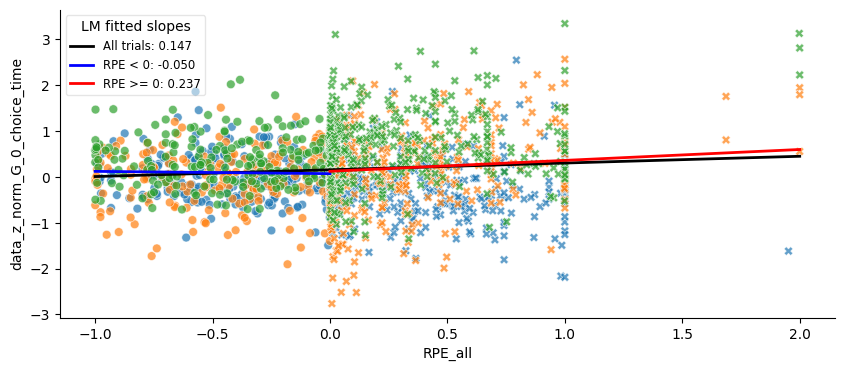

In [126]:
plt.figure(figsize=(10,4))
summary_plots.plot_RPE_by_avg_signal(df_trials_all, 'data_z_norm_G_0_choice_time', ax=plt.gca())

In [46]:
df_trials_all

,trial,choice,rewarded_historyL,rewarded_historyR,side_bias,side_bias_confidence_interval,bait_left,bait_right,base_reward_probability_sum,reward_probabilityL,...,data_z_G_0_dff-bright_mc-iso-IRLS_baseline,data_R_0_dff-bright_mc-iso-IRLS_baseline,data_z_R_0_dff-bright_mc-iso-IRLS_baseline,data_R_1_dff-bright_mc-iso-IRLS_baseline,data_z_R_1_dff-bright_mc-iso-IRLS_baseline,reward_all,num_reward_past,RPE-binned3,week_interval,data_z_norm_G_0_choice_time
0,0,0.0,True,False,0,"[nan, nan]",True,False,0.8,0.9,...,0.084591,0.031121,-0.112737,0.006355,-0.126776,True,1,NaN,1,3.586974
1,1,0.0,True,False,0,"[nan, nan]",True,False,0.8,0.9,...,1.759506,0.074455,1.455195,0.040561,1.230932,True,2,0.33,1,3.331432
2,2,0.0,True,False,0,"[nan, nan]",True,False,0.8,0.9,...,2.690190,0.061461,0.985048,0.020876,0.449604,True,3,0.33,1,1.860663
3,3,0.0,True,False,0,"[nan, nan]",True,False,0.8,0.9,...,2.602574,0.068490,1.239386,0.034024,0.971465,True,4,-0.0,1,1.248380
4,4,0.0,True,False,0,"[nan, nan]",True,False,0.8,0.9,...,2.507887,0.060570,0.952806,0.016926,0.292811,True,5,-0.0,1,1.478201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,515,1.0,False,True,-9223372036854775808,"[nan, nan]",True,True,0.8,0.9,...,-0.010209,0.029579,-0.226031,0.007879,0.197308,True,2,0.33,1,0.126381
1059,516,1.0,False,True,-9223372036854775808,"[nan, nan]",True,True,0.8,0.9,...,0.288476,0.032113,-0.129788,0.003804,-0.008736,True,3,0.33,1,-0.531286
1060,517,1.0,False,True,-9223372036854775808,"[nan, nan]",True,True,0.8,0.9,...,-0.720810,0.020296,-0.578615,-0.000234,-0.212930,True,4,-0.0,1,0.566087
1061,518,1.0,False,True,-9223372036854775808,"[nan, nan]",True,True,0.8,0.9,...,-1.058457,0.018505,-0.646644,-0.016569,-1.038940,True,5,-0.0,1,-0.063464


<Axes: xlabel='RPE_all', ylabel='avg_post_choice'>

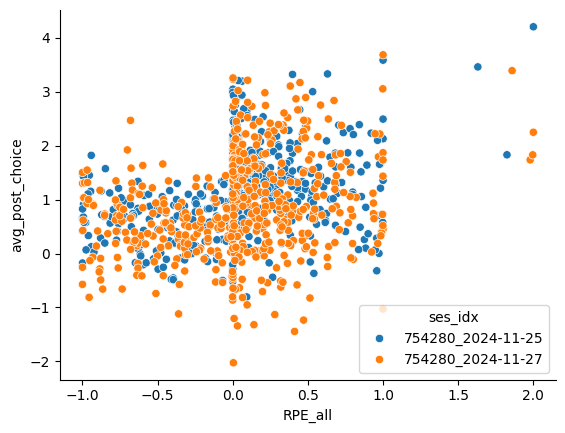

In [ ]:
sns.scatterplot(data = df_trials_all, 
                x = 'RPE_all', y = 'avg_post_choice', hue = 'ses_idx')

df_trials_all

# big plotting function

In [135]:
from analysis_wrapper.plots import summary_plots
reload(summary_plots)

<module 'analysis_wrapper.plots.summary_plots' from '/root/capsule/code/analysis_wrapper/plots/summary_plots.py'>

2025-09-13 01:50:17,110 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 01:50:20,469 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 01:50:23,167 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 01:50:29,137 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 01:50:32,895 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 01:50:37,924 - WARNING -

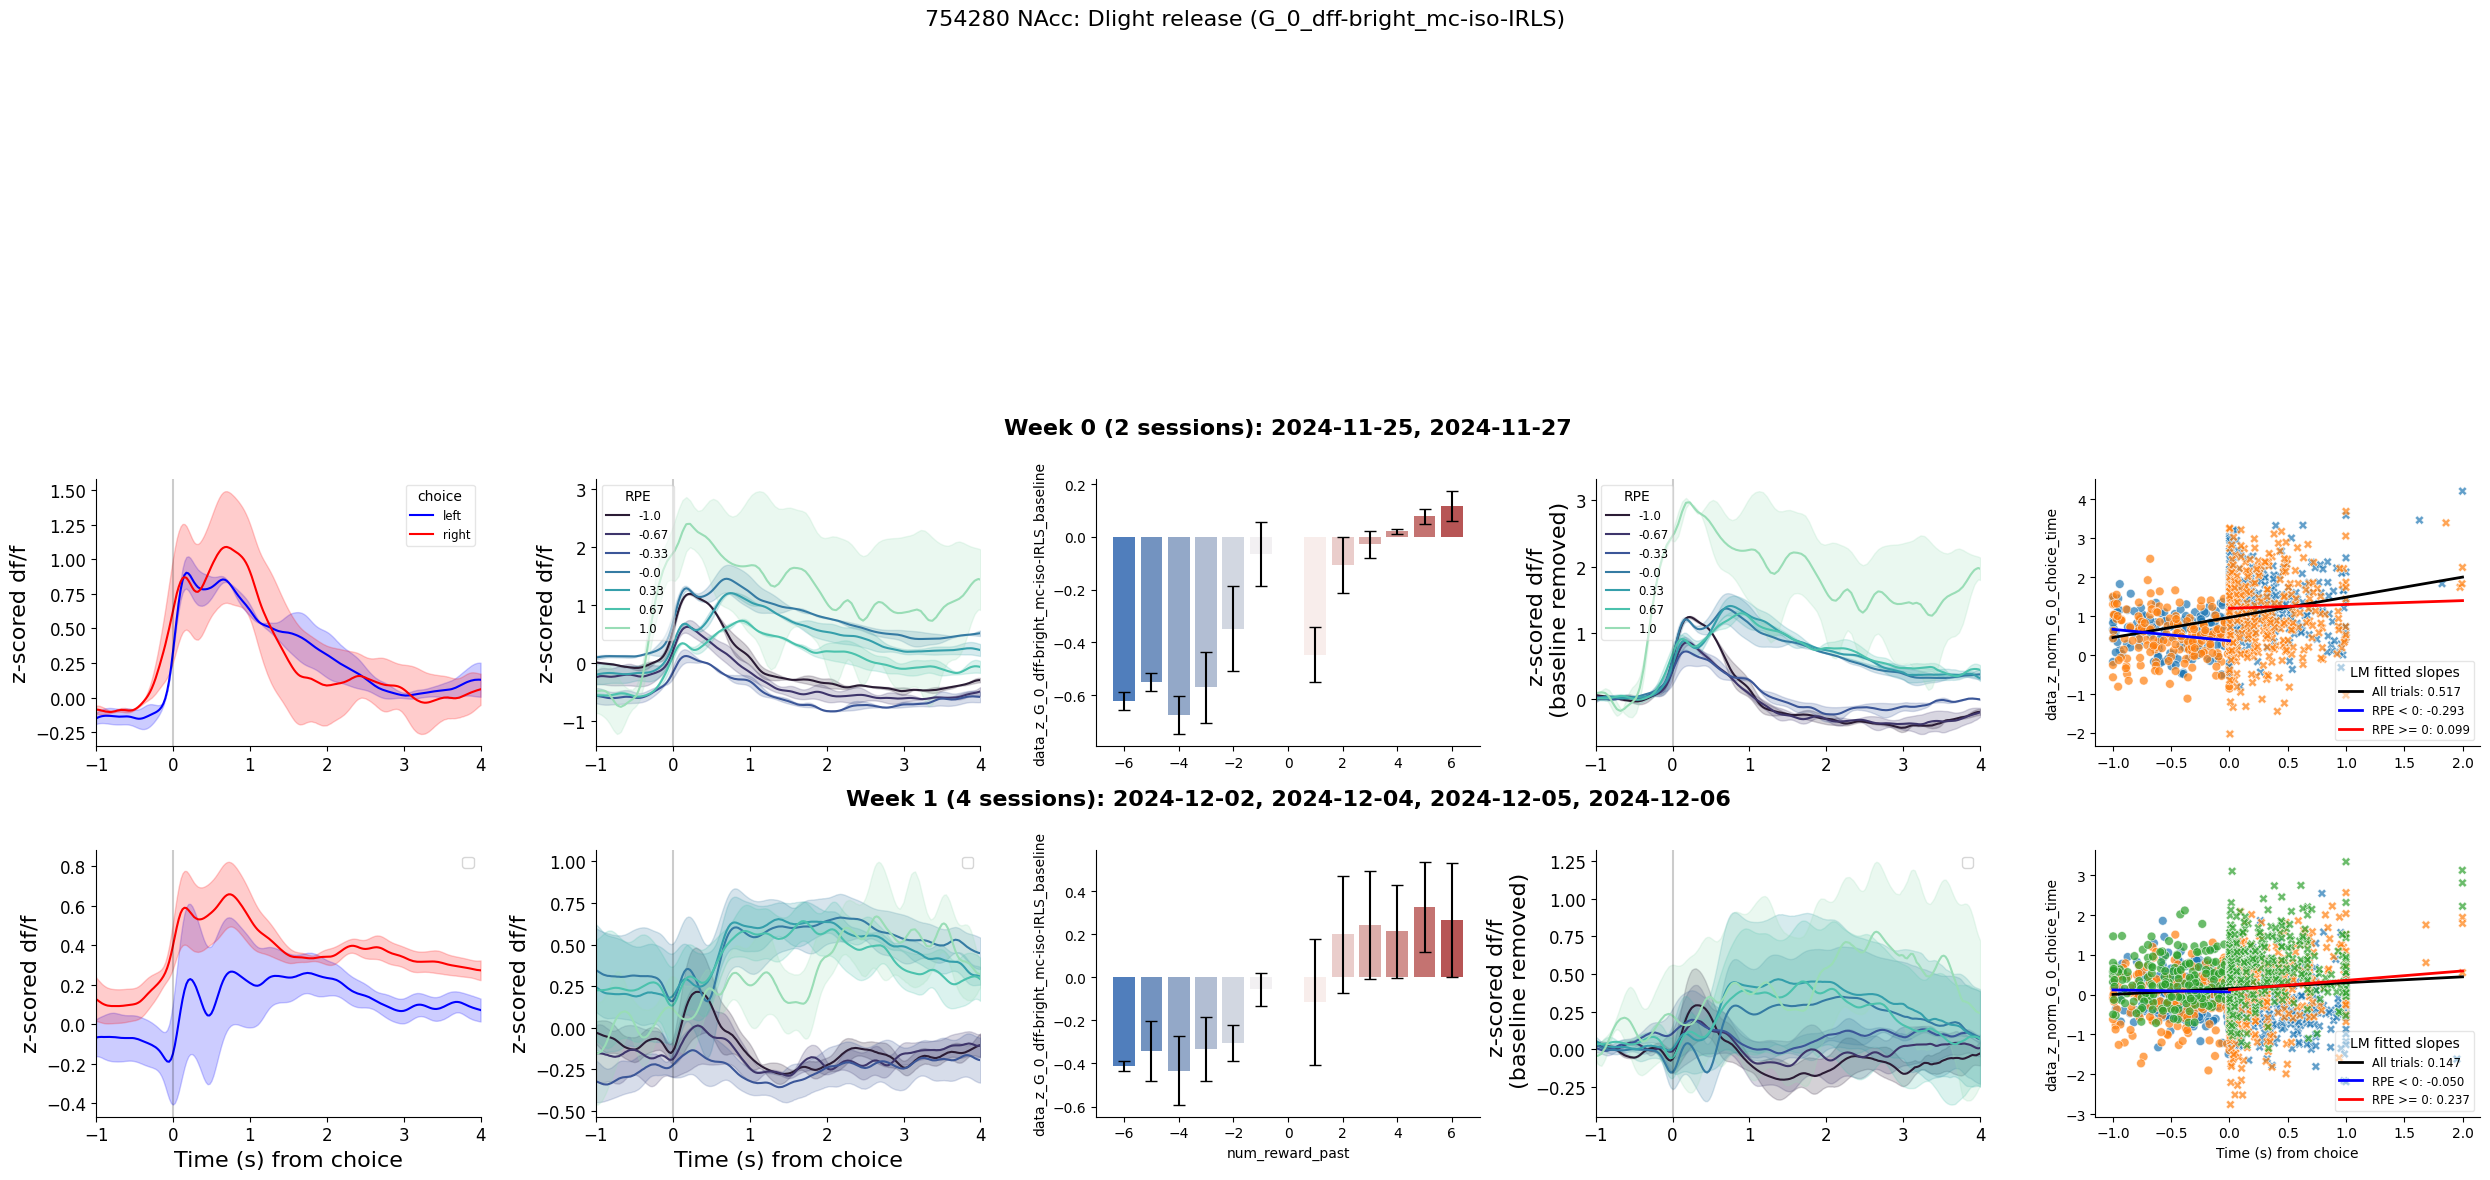

In [136]:
channel = list(analysis_specification["channels"].keys())[0]
channel_loc = analysis_specification["channels"][channel]
summary_plots.plot_weekly_grid(df_sess,nwbs_by_week, channel, channel_loc, loc = None)

2025-09-13 02:04:36,223 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 02:04:41,922 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 02:04:48,902 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 02:04:59,737 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 02:05:05,106 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-09-13 02:05:10,562 - WARNING -

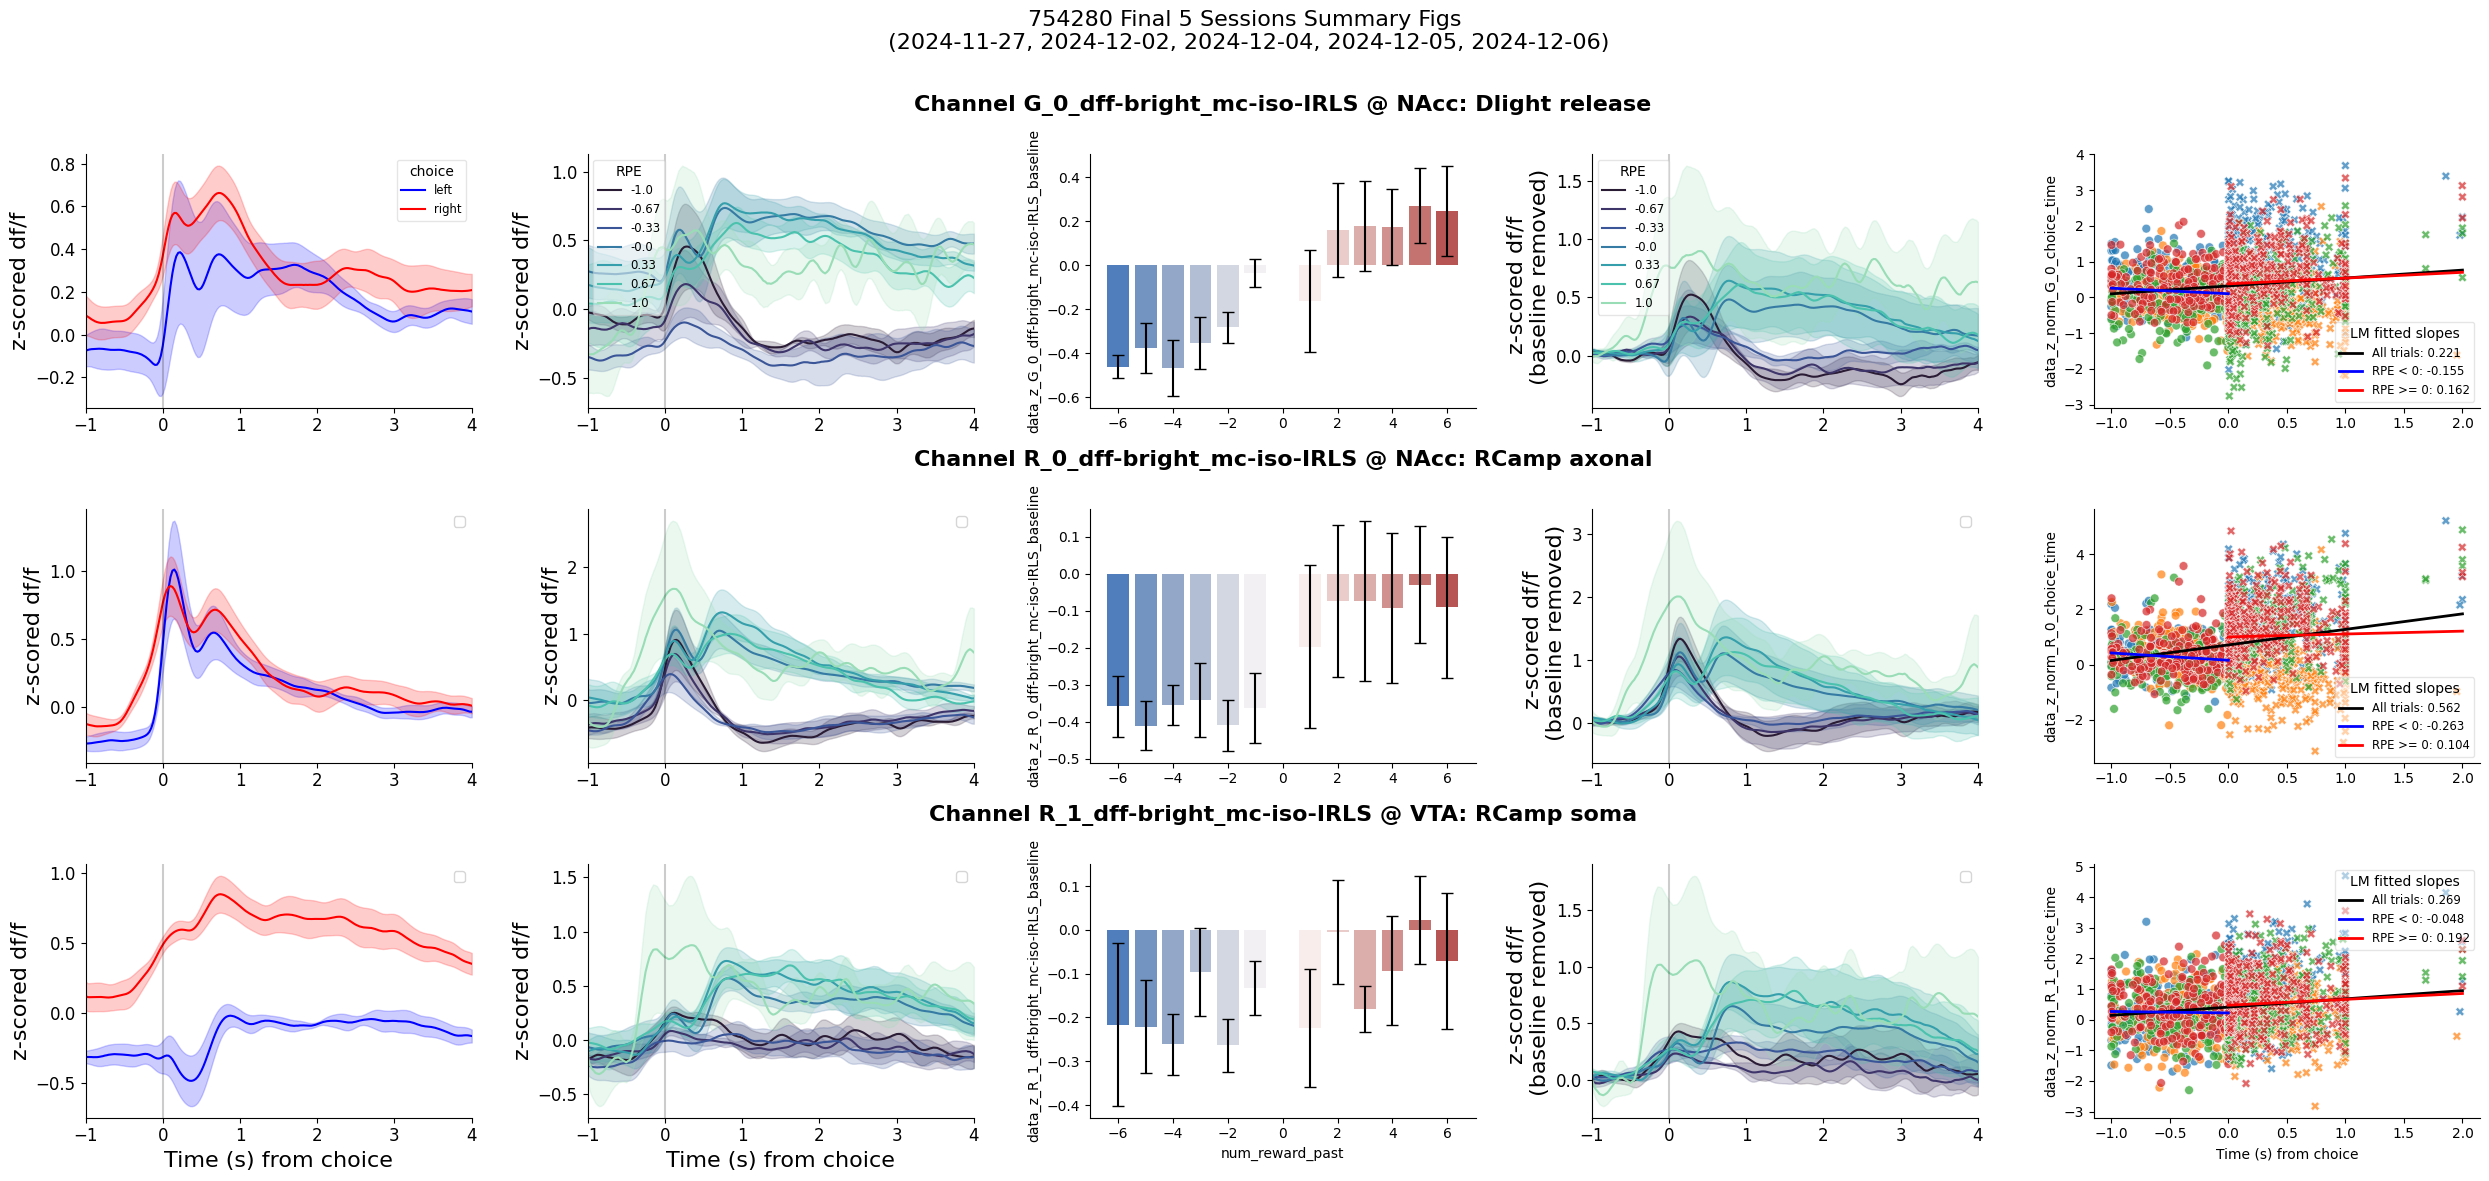

In [144]:
summary_plots.plot_clean_final_N_sess(df_sess, nwbs_by_week, analysis_specification["channels"], final_N_sess = 5, loc = None)



# old code

In [ ]:
        # # TEMP UNTIL SESSION_STAGE IS FIXED
        # df = get_session_table(if_load_bpod=False)
        # subject_id = analysis_dispatch_inputs.file_location[0].split('behavior_')[1].split('_')[0]
        # df_trained = df[(df['subject_id'] == subject_id) & (df['current_stage_actual'].isin(['STAGE_FINAL','GRADUATED']))]
        # session_names = [
        #     f"{row['subject_id']}_{row['session_date'].strftime('%Y-%m-%d')}"
        #     for _, row in df_trained.iterrows()
        # ]
        # filtered_file_locations = [
        #     f for f in analysis_dispatch_inputs.file_location
        #     if any(session_name in f for session_name in session_names)
        # ]

